In [6]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
file_path = '/media/data/projects/crophisto/data.csv'
crop_codes = '/media/data/projects/crophisto/crop_codes.csv'

# load crop info
df_crops = pd.read_csv(crop_codes, sep=";")

# create vocab map
crop_map = {row["code"]:row["description"] for index, row in df_crops[["code", "description"]].iterrows()}


In [8]:
df_crops

,code,description,is_crop
0,1,TRIGO,1
1,3,URBANO-VIALES,0
2,4,MAIZ,1
3,5,CEBADA,1
4,8,OTROS CEREALES,1
5,9,ROQUEDOS,0
6,20,SUELO DESNUDO,1
7,33,GIRASOL,1
8,35,COLZA,1
9,39,OTRAS LEGUMINOSAS GRANO,1


In [9]:
# load dataframe
df = pd.read_csv(file_path)
cols = ['C_TIPO_EXP','Holding__1','C_ZONA_AGR',
        'crop2011', 'crop2012', 'crop2013', 'crop2014', 'crop2016', 'crop2015', 'crop2017', 'crop2018', 'crop2019']

crop_cols =  ['crop2011', 'crop2012', 'crop2013', 'crop2014', 'crop2016', 'crop2015', 'crop2017', 'crop2018', 'crop2019']



In [10]:
mask = df["C_TIPO_EXP"] =="S"
# df[]["C_TIPO_EXP"] = 0
# df[df["C_TIPO_EXP"] =="R"]["C_TIPO_EXP"] = 1
df.loc[mask, ["C_TIPO_EXP"]] = 0
df.loc[~mask, ["C_TIPO_EXP"]] = 1
df.head()

,Join_Count,TARGET_FID,C_PRODUCTO,C_TIPO_EXP,SUPERFICIE,C_ZONA_AGR,COD_CULTIV,F_CARGA,C_CICLO,C_SCENARIO,...,crop2012,crop2013,crop2014,crop2016,crop2015,crop2017,crop2018,crop2019,FOI_ID,Holding__1
0,1,1557935,20,0,3659.745253,5,20,2020-01-20,0,BSO,...,1,1,201,8,1,20,8,20,11227689,42200496
1,1,1557936,20,0,3145.595066,5,20,2020-01-20,0,BSO,...,20,1,61,1,8,20,1,61,11227690,42200496
2,1,1557937,20,0,1148.254304,5,20,2020-01-20,0,BSO,...,1,1,61,200,20,200,200,200,11227691,42200496
3,1,1557938,20,0,3155.065480,5,20,2020-01-20,0,BSO,...,201,1,201,1,1,1,8,20,11227692,42200496
4,1,1557939,20,0,782.876447,5,20,2020-01-20,0,BSO,...,61,201,8,1,8,5,1,20,11227693,42200496


In [27]:
# df.groupby(["Holding__1"]).agg(['count'])["FOI_ID"].plot(kind="bar")
# df.groupby(["Holding__1"]).agg(['count'])["FOI_ID"].plot.hist()
values = df.groupby(["Holding__1"]).agg(['count'])["FOI_ID"]["count"].values



# np.histogram(values)

array([40, 48, 50, ...,  8,  1,  7])

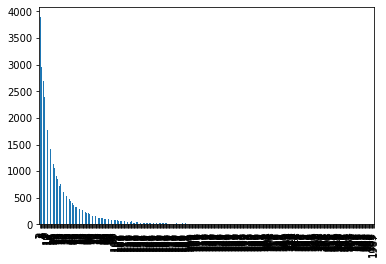

In [30]:

fig = pd.value_counts(values).sort_index().plot(kind='bar')



In [6]:
df[df["crop2012"] == 3]

,Join_Count,TARGET_FID,C_PRODUCTO,C_TIPO_EXP,SUPERFICIE,C_ZONA_AGR,COD_CULTIV,F_CARGA,C_CICLO,C_SCENARIO,...,crop2012,crop2013,crop2014,crop2016,crop2015,crop2017,crop2018,crop2019,FOI_ID,Holding__1
5204,1,1563139,5,0,1118.419992,3,32,2020-01-20,1,CHI,...,3,3,3,3,3,5,5,1,11233995,42200610
5296,1,1563231,1,0,1691.426845,4,31,2020-01-20,1,CHI,...,3,3,3,3,1,1,5,1,11231296,42200563
5340,1,1563275,1,0,948.765138,4,31,2020-01-20,1,CHI,...,3,3,3,3,3,3,3,3,11232258,42200571
5766,1,1563701,60,1,1312.278660,3,2,2020-01-20,0,CHP,...,3,5,61,3,94,3,20,1,11234314,42200612
6071,1,1564006,1,0,713.199045,3,31,2020-01-20,1,CHI,...,3,5,5,3,5,1,20,5,11230723,42200551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132794,1,1550811,20,0,2390.109625,3,20,2020-01-20,0,BSO,...,3,3,5,110,20,20,5,20,11220039,42200340
2132841,1,1550858,5,0,720.471463,3,32,2020-01-20,1,CHI,...,3,3,3,3,3,200,5,5,11220874,42200364
2134198,1,1552215,20,1,554.618324,3,20,2020-01-20,0,BSO,...,3,3,201,3,3,3,3,3,11208662,42101826
2135931,1,1553948,5,1,2574.029117,4,32,2020-01-20,1,CHI,...,3,5,61,1,202,33,1,5,11208848,42101828


In [11]:
print(">>>>Valores en y")
y = df['crop2019']

crop_codes = df_crops["code"]

for code in crop_codes:
    print("code: {} - {}: {}".format(code, crop_map[code], y[y==code].shape[0]))

print(">>>>Valores en X")
# crop_cols = [x for x in cols if x.startswith("crop")]
X = df[cols[:-1]]
for code in crop_codes:
    print("code: {} - {}: {}".format(code, crop_map[code],  X[(X[:]==code).any(1)].shape[0]))    

X.shape


>>>>Valores en y
code: 1 - TRIGO: 462888
code: 3 - URBANO-VIALES: 38443
code: 4 - MAIZ: 54199
code: 5 - CEBADA: 337891
code: 8 - OTROS CEREALES: 89706
code: 9 - ROQUEDOS: 1196
code: 20 - SUELO DESNUDO: 328147
code: 33 - GIRASOL: 128978
code: 35 - COLZA: 4255
code: 39 - OTRAS LEGUMINOSAS GRANO: 9931
code: 40 - GUISANTES: 13151
code: 60 - ALFALFA: 47632
code: 61 - FORRAJERAS: 55395
code: 80 - OTROS CULTIVOS INDUSTRIALES: 817
code: 82 - REMOLACHA: 6878
code: 94 - PATATAS: 0
code: 100 - VIÑEDO: 25631
code: 101 - OLIVAR: 6923
code: 110 - HORTICOLA: 3176
code: 177 - AROMATICAS: 7201
code: 181 - FRUTALES: 8657
code: 183 - FRUTALES CASCARA: 3806
code: 200 - PASTIZAL: 261095
code: 201 - MATORRAL: 96606
code: 202 - CONIFERAS: 11556
code: 203 - FRONDOSAS CADUCIFOLIAS: 60894
code: 204 - FRONDOSAS SIEMPRE VERDES: 74487
code: 255 - LAMINA AGUA: 378
code: 52 - ERROR1: 0
>>>>Valores en X
code: 1 - TRIGO: 1397012
code: 3 - URBANO-VIALES: 597091
code: 4 - MAIZ: 625827
code: 5 - CEBADA: 1289441
code: 8 -

(2139917, 11)

In [8]:
# remove all rows with code "52" -> and 94 -> 15


crops_to_remove = [52, 94]

# remove rows  with category 28
filtered = df
print(filtered.shape)
for code in crops_to_remove:
    filtered =filtered[~ (filtered[:]==code).any(1)]
    print(filtered.shape)


df_crops = df_crops[~(df_crops["code"].isin(crops_to_remove ))]
df_crops["idx"] = df_crops.index



(2139917, 25)
(2036270, 25)
(1984471, 25)


/home/gus/workspaces/wpy/venvs/mathor/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
df_crops


,code,description,is_crop,idx
0,1,TRIGO,1,0
1,3,URBANO-VIALES,0,1
2,4,MAIZ,1,2
3,5,CEBADA,1,3
4,8,OTROS CEREALES,1,4
5,9,ROQUEDOS,0,5
6,20,SUELO DESNUDO,1,6
7,33,GIRASOL,1,7
8,35,COLZA,1,8
9,39,OTRAS LEGUMINOSAS GRANO,1,9


In [10]:
#convert data to codes
# df_outer = pd.merge(df1, df2, on='id', how='outer')

In [11]:


crop_list = df_crops["code"].to_numpy()

crop_map = {val: idx for idx, val in enumerate(crop_list)}

df_sel = filtered[cols]
# print(df_sel)


# we have to convert each code into a numeric serie, we will use label encoder
from sklearn import preprocessing
le_crops = preprocessing.LabelEncoder()

# fit the encoder using one column and apply to all crop columns
matrix = df_sel.values
y = matrix[:,-1]
le_crops.fit_transform(y)

# apply transformation to each column
for crop_col in range(3,12): 
    matrix[:,crop_col] = le_crops.transform(matrix[:,crop_col])


# same for holding column (number 1)
le = preprocessing.LabelEncoder()
matrix[:,1] = le.fit_transform(matrix[:,1])



In [12]:
for row in df_crops.itertuples():
    try:
        df_crops.loc[row.Index, 'new_code'] = le.inverse_transform([row["code"]])
    except:
        pass

df_crops.to_pickle("/media/data/projects/crophisto/crop_codes.pckl")


In [13]:
df_crops

,code,description,is_crop,idx
0,1,TRIGO,1,0
1,3,URBANO-VIALES,0,1
2,4,MAIZ,1,2
3,5,CEBADA,1,3
4,8,OTROS CEREALES,1,4
5,9,ROQUEDOS,0,5
6,20,SUELO DESNUDO,1,6
7,33,GIRASOL,1,7
8,35,COLZA,1,8
9,39,OTRAS LEGUMINOSAS GRANO,1,9


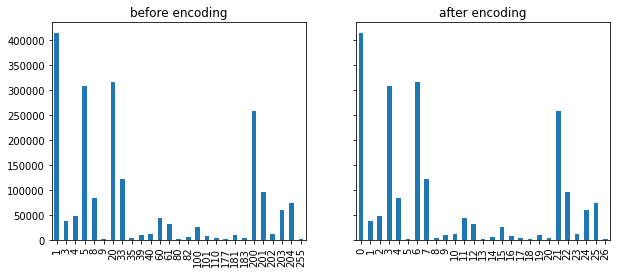

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey = True)
axs[0].set_title("before encoding")
axs[1].set_title("after encoding")
fig = filtered["crop2019"].value_counts().sort_index().plot(ax=axs[0],kind='bar')
fig = pd.value_counts(matrix[:,-1]).sort_index().plot(ax=axs[1],kind='bar')



In [15]:
filtered[crop_cols]

,crop2011,crop2012,crop2013,crop2014,crop2016,crop2015,crop2017,crop2018,crop2019
0,201,1,1,201,8,1,20,8,20
1,201,20,1,61,1,8,20,1,61
2,201,1,1,61,200,20,200,200,200
3,61,201,1,201,1,1,1,8,20
4,201,61,201,8,1,8,5,1,20
...,...,...,...,...,...,...,...,...,...
2139912,201,200,201,61,1,8,1,8,20
2139913,201,201,201,201,201,8,1,8,20
2139914,61,1,201,8,1,1,1,1,20
2139915,9,200,1,201,61,20,20,1,20


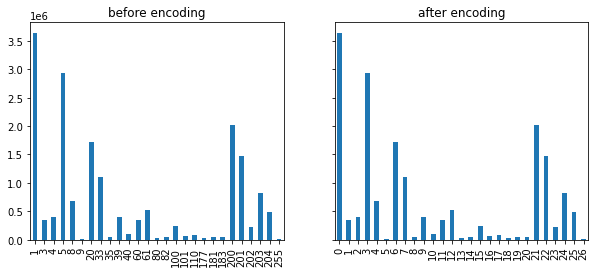

In [16]:

prev_matrix = filtered[crop_cols].values.flatten()
after_matrix = matrix[:,3:12].flatten()

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey = True)
axs[0].set_title("before encoding")
axs[1].set_title("after encoding")
fig = pd.value_counts(prev_matrix).sort_index().plot(ax=axs[0],kind='bar')
fig = pd.value_counts(after_matrix).sort_index().plot(ax=axs[1],kind='bar')


In [17]:
# data_file = "/media/data/projects/crophisto/data.npy"
# np.save(data_file, matrix)
